# 课时13 Softmax多分类

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('darkgrid')
import matplotlib.pyplot as plt
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.4.0


# 1. 加载和处理fashion_mnist数据集

In [5]:
# 加载fashion_mnist数据集
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
# 将数据集划分训练集和测试集
(train_image, train_label), (test_image, test_label) = fashion_mnist

4423680/4422102 [==============================] - 3s 1us/step


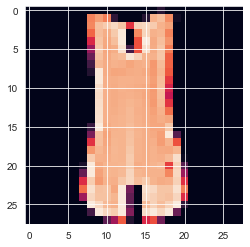

In [7]:
plt.imshow(train_image[4])

In [9]:
# 对于训练数据和测试数据的图片进行归一化：
train_image = train_image / 255
test_image = test_image / 255
train_image.shape

(60000, 28, 28)

# 2. 建立模型

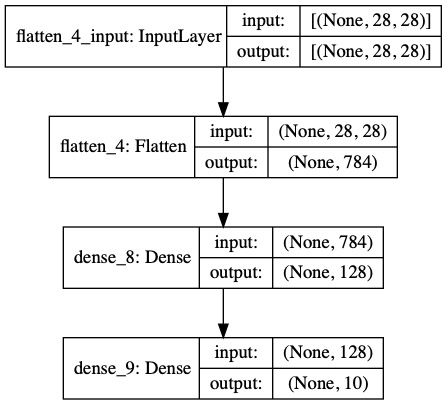

In [14]:
model = tf.keras.Sequential([
    # 在使用全连接神经网络的是使用Flatten层将图片数据转换成一维向量
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])
tf.keras.utils.plot_model(model, './model_structure_image/softmax.jpg',                                       show_shapes=True)

# 3. 模型编译和训练

In [15]:
# 在tf.keras中，对于多分类问题我们使用：
# categorical_crossentropy或者sparse_categorical_crossentropy来计算Softmax交叉熵
# 其中categorical_crossentropy对应的是one-hot编码的数据
# sparse_categorical_crossentropy对应的是非one-hot编码的数据
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])
model.fit(train_image, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4916 - acc: 0.5400
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6556 - acc: 0.7676
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5703 - acc: 0.7950
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5233 - acc: 0.8145
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4941 - acc: 0.8258


# 4. 模型在测试集上评估

In [16]:
# 评估模型的正确率
model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.5148 - acc: 0.8157


[0.5147819519042969, 0.8156999945640564]

# 5. one-hot编码和交叉熵损失函数

In [18]:
# 查看label的类型
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
# 将训练集标签转换为one-hot编码
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [24]:
# 在转换为了one-hot编码的数据集上重新进行数据集的训练
model = tf.keras.Sequential([
    # 在使用全连接神经网络的是使用Flatten层将图片数据转换成一维向量
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])

# 多种方式定义模型的编译环节
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# categorical_crossentropy代表one-hot编码情况下的loss函数
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy', 
              metrics=['acc'])
model.fit(train_image, train_label_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8579 - acc: 0.6962
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4530 - acc: 0.8357
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3971 - acc: 0.8563
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3783 - acc: 0.8634
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3583 - acc: 0.8704


In [26]:
predict = model.predict(test_image)
predict.shape

(10000, 10)

# 6. 增加模型的网络复杂度

In [23]:
# 在转换为了one-hot编码的数据集上重新进行数据集的训练
model = tf.keras.Sequential([
    # 在使用全连接神经网络的是使用Flatten层将图片数据转换成一维向量
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])
tf.keras.utils.plot_model(model, './model_structure_image/softmax_2.jpg',                                       show_shapes=True)
# 多种方式定义模型的编译环节
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['acc'])
# 训练时添加交叉验证集validation_data
history = model.fit(train_image, train_label_onehot, epochs=10, 
                    validation_data=(test_image, test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1208 - acc: 0.5828 - val_loss: 0.6180 - val_acc: 0.7770
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5741 - acc: 0.7869 - val_loss: 0.5174 - val_acc: 0.8138
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4904 - acc: 0.8212 - val_loss: 0.4853 - val_acc: 0.8226
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4430 - acc: 0.8380 - val_loss: 0.4550 - val_acc: 0.8333
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4092 - acc: 0.8500 - val_loss: 0.4334 - val_acc: 0.8408
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3854 - acc: 0.8583 - val_loss: 0.4110 - val_acc: 0.8496
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3634 - acc: 0.8662 - val_loss: 0.4167 - val_acc: 0.8461
Epoch 8/10
1875/1875 [==============================] - 1

In [27]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

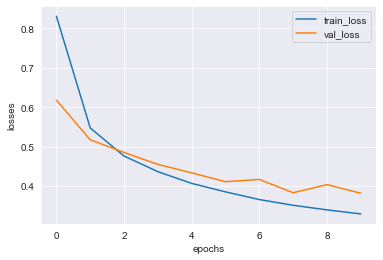

In [28]:
plt.plot(history.epoch, history.history.get('loss'), label='train_loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend()

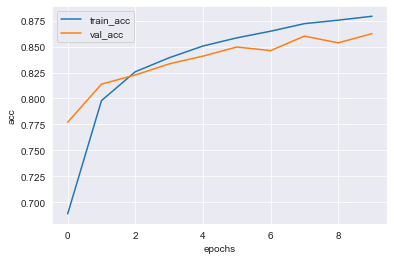

In [29]:
plt.plot(history.epoch, history.history.get('acc'), label='train_acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

# 7. 网络添加Dropout层——减弱模型的过拟合程度

In [30]:
# 在转换为了one-hot编码的数据集上重新进行数据集的训练
model = tf.keras.Sequential([
    # 在使用全连接神经网络的是使用Flatten层将图片数据转换成一维向量
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')])
model.summary()
# 多种方式定义模型的编译环节
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['acc'])
# 训练时添加交叉验证集validation_data
history = model.fit(train_image, train_label_onehot, epochs=10, 
                    validation_data=(test_image, test_label_onehot))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

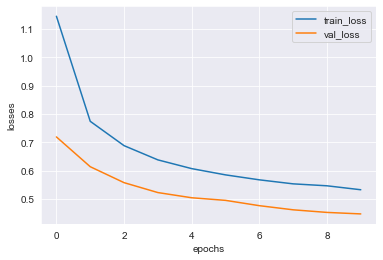

In [31]:
plt.plot(history.epoch, history.history.get('loss'), label='train_loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend()

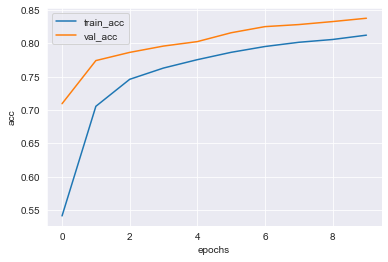

In [32]:
plt.plot(history.epoch, history.history.get('acc'), label='train_acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()